# CROP RECOMMENDATION SYSTEM 

![](https://images.unsplash.com/photo-1560493676-04071c5f467b?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=968&q=80)

In [ ]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


In [ ]:
from pycaret.utils import version
version()

'2.3.10'

In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#PATH = '../input/crop-rv'ecommendation-dataset/Crop_recommendation.cs
import csv
%cd /content/

# with open('/Crop_recommendation.csv', 'r') as csvfile:
#   reader = csv.reader(csvfile)
#   rows = [row for row in reader]

# print(rows)
df = pd.read_csv('Crop_recommendation.csv')

/content


In [ ]:
df.shape()

TypeError: ignored

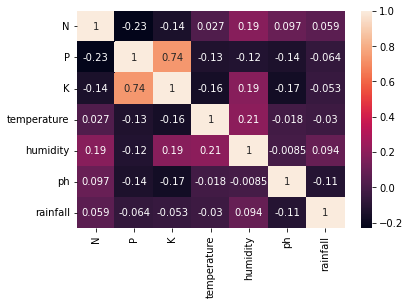

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
import jinja2

**Model performance using normalization**

In [ ]:
from pycaret.classification import *
s=setup(data=df, target='label',
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9955,1.0000,0.9951,0.9962,0.9954,0.9952,0.9953,0.595
et,Extra Trees Classifier,0.9955,1.0000,0.9951,0.9961,0.9954,0.9952,0.9953,0.503
nb,Naive Bayes,0.9948,1.0000,0.9945,0.9958,0.9947,0.9945,0.9946,0.026
qda,Quadratic Discriminant Analysis,0.9942,1.0000,0.9938,0.9949,0.9941,0.9939,0.9939,0.026
lightgbm,Light Gradient Boosting Machine,0.9883,0.9999,0.9876,0.9899,0.9882,0.9877,0.9878,1.035
dt,Decision Tree Classifier,0.9857,0.9925,0.9852,0.9872,0.9856,0.9850,0.9851,0.029
gbc,Gradient Boosting Classifier,0.9857,0.9998,0.9852,0.9878,0.9856,0.9850,0.9851,6.658
knn,K Neighbors Classifier,0.9740,0.9971,0.9742,0.9784,0.9738,0.9728,0.9730,0.130
lr,Logistic Regression,0.9630,0.9994,0.9634,0.9678,0.9626,0.9612,0.9615,0.453
lda,Linear Discriminant Analysis,0.9610,0.9996,0.9614,0.9678,0.9608,0.9591,0.9595,0.026


**Model performance using feature selection**

In [ ]:
setup(data=df, target='label',
      feature_selection = True, feature_selection_method = 'classic', 
      feature_selection_threshold = 0.2, silent=True)
cm = compare_models()

#feature_selection_method = {classic, boruta}

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7856,0.9876,0.7842,0.7988,0.7827,0.7753,0.7762,0.579
et,Extra Trees Classifier,0.7745,0.9832,0.7723,0.7904,0.7712,0.7637,0.7647,0.516
nb,Naive Bayes,0.7732,0.9906,0.7723,0.7913,0.7672,0.7624,0.7636,0.025
gbc,Gradient Boosting Classifier,0.7732,0.9859,0.7713,0.7900,0.7683,0.7624,0.7635,4.490
qda,Quadratic Discriminant Analysis,0.7674,0.9904,0.7666,0.7864,0.7623,0.7562,0.7575,0.028
lightgbm,Light Gradient Boosting Machine,0.7615,0.9826,0.7590,0.7742,0.7592,0.7501,0.7509,0.997
knn,K Neighbors Classifier,0.7609,0.9640,0.7603,0.7874,0.7546,0.7495,0.7511,0.124
dt,Decision Tree Classifier,0.7603,0.8745,0.7584,0.7705,0.7572,0.7488,0.7496,0.026
lda,Linear Discriminant Analysis,0.6835,0.9773,0.6793,0.6741,0.6558,0.6683,0.6720,0.027
lr,Logistic Regression,0.6497,0.9682,0.6462,0.6451,0.6182,0.6329,0.6380,1.665


In [ ]:
setup(data=df, target='label',feature_selection = True, feature_selection_method = 'boruta', feature_selection_threshold = 0.2, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9961,1.0000,0.9961,0.9966,0.9961,0.9959,0.9959,0.581
nb,Naive Bayes,0.9954,1.0000,0.9955,0.9959,0.9954,0.9952,0.9952,0.026
et,Extra Trees Classifier,0.9948,1.0000,0.9948,0.9956,0.9947,0.9945,0.9946,0.505
lightgbm,Light Gradient Boosting Machine,0.9928,1.0000,0.9930,0.9937,0.9928,0.9925,0.9926,0.937
qda,Quadratic Discriminant Analysis,0.9922,1.0000,0.9923,0.9931,0.9922,0.9918,0.9919,0.026
dt,Decision Tree Classifier,0.9883,0.9939,0.9883,0.9897,0.9882,0.9877,0.9878,0.028
gbc,Gradient Boosting Classifier,0.9844,0.9998,0.9845,0.9866,0.9842,0.9837,0.9838,6.873
knn,K Neighbors Classifier,0.9818,0.9992,0.9815,0.9852,0.9816,0.9809,0.9811,0.132
lr,Logistic Regression,0.9688,0.9996,0.9687,0.9725,0.9686,0.9673,0.9675,1.745
lda,Linear Discriminant Analysis,0.9623,0.9996,0.9623,0.9685,0.9613,0.9605,0.9609,0.024


**Model performance using outlier removal**

In [ ]:
setup(data=df, target='label',
      remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9938,1.0000,0.9942,0.9948,0.9938,0.9935,0.9936,0.026
rf,Random Forest Classifier,0.9938,1.0000,0.9940,0.9948,0.9938,0.9935,0.9936,0.565
qda,Quadratic Discriminant Analysis,0.9925,0.9999,0.9926,0.9937,0.9924,0.9921,0.9922,0.026
et,Extra Trees Classifier,0.9904,0.9999,0.9908,0.9920,0.9903,0.9899,0.9900,0.504
lightgbm,Light Gradient Boosting Machine,0.9877,0.9999,0.9868,0.9894,0.9876,0.9871,0.9872,1.144
gbc,Gradient Boosting Classifier,0.9850,0.9999,0.9844,0.9875,0.9850,0.9842,0.9844,6.368
dt,Decision Tree Classifier,0.9822,0.9907,0.9825,0.9852,0.9819,0.9813,0.9815,0.030
knn,K Neighbors Classifier,0.9761,0.9994,0.9771,0.9794,0.9759,0.9749,0.9751,0.129
lr,Logistic Regression,0.9699,0.9995,0.9708,0.9737,0.9692,0.9684,0.9687,1.670
lda,Linear Discriminant Analysis,0.9665,0.9997,0.9678,0.9716,0.9660,0.9648,0.9651,0.027


**Model Performance using pca**

In [ ]:
setup(data=df, target='label',
      pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9896,0.9999,0.9899,0.9914,0.9895,0.9891,0.9892,0.026
et,Extra Trees Classifier,0.9844,0.9998,0.9846,0.9863,0.9842,0.9836,0.9838,0.509
nb,Naive Bayes,0.9812,0.9997,0.9817,0.9842,0.9810,0.9803,0.9804,0.029
knn,K Neighbors Classifier,0.9786,0.9984,0.9788,0.9820,0.9782,0.9775,0.9777,0.122
lr,Logistic Regression,0.9779,0.9997,0.9778,0.9809,0.9777,0.9768,0.9770,1.746
rf,Random Forest Classifier,0.9773,0.9997,0.9774,0.9798,0.9770,0.9762,0.9763,0.618
lightgbm,Light Gradient Boosting Machine,0.9721,0.9994,0.9722,0.9755,0.9718,0.9707,0.9709,1.018
gbc,Gradient Boosting Classifier,0.9591,0.9985,0.9589,0.9655,0.9592,0.9571,0.9574,6.248
lda,Linear Discriminant Analysis,0.9532,0.9993,0.9542,0.9605,0.9530,0.9510,0.9514,0.024
dt,Decision Tree Classifier,0.9435,0.9704,0.9419,0.9482,0.9425,0.9408,0.9411,0.027


**Model performance using Transformation**

In [ ]:
setup(data=df, target='label',
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.9955,1.0000,0.9956,0.9957,0.9954,0.9952,0.9952,0.027
rf,Random Forest Classifier,0.9942,1.0000,0.9942,0.9948,0.9941,0.9939,0.9939,0.572
et,Extra Trees Classifier,0.9929,1.0000,0.9930,0.9933,0.9928,0.9925,0.9925,0.492
qda,Quadratic Discriminant Analysis,0.9922,1.0000,0.9923,0.9930,0.9922,0.9918,0.9919,0.052
gbc,Gradient Boosting Classifier,0.9896,0.9999,0.9898,0.9909,0.9896,0.9891,0.9892,6.644
lightgbm,Light Gradient Boosting Machine,0.9851,0.9998,0.9850,0.9865,0.9849,0.9843,0.9844,1.018
dt,Decision Tree Classifier,0.9838,0.9915,0.9838,0.9862,0.9837,0.9830,0.9831,0.028
knn,K Neighbors Classifier,0.9734,0.9978,0.9734,0.9782,0.9726,0.9721,0.9724,0.129
lr,Logistic Regression,0.9727,0.9995,0.9727,0.9751,0.9725,0.9714,0.9716,0.167
lda,Linear Discriminant Analysis,0.9688,0.9997,0.9690,0.9726,0.9684,0.9673,0.9675,0.027


**Accuracy using "Outlier Removal" + "Normalization"** 

In [ ]:
setup(data=df, target='label',
      remove_outliers = True, outliers_threshold = 0.05,
      normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9959,1.0000,0.9960,0.9964,0.9959,0.9957,0.9957,0.566
nb,Naive Bayes,0.9945,1.0000,0.9946,0.9954,0.9945,0.9943,0.9943,0.027
et,Extra Trees Classifier,0.9932,1.0000,0.9933,0.9941,0.9931,0.9928,0.9929,0.494
qda,Quadratic Discriminant Analysis,0.9918,1.0000,0.9918,0.9930,0.9917,0.9914,0.9915,0.027
gbc,Gradient Boosting Classifier,0.9904,1.0000,0.9908,0.9921,0.9903,0.9900,0.9901,6.581
lightgbm,Light Gradient Boosting Machine,0.9884,0.9999,0.9887,0.9894,0.9882,0.9878,0.9879,0.977
dt,Decision Tree Classifier,0.9870,0.9932,0.9872,0.9885,0.9869,0.9864,0.9865,0.028
knn,K Neighbors Classifier,0.9720,0.9975,0.9727,0.9769,0.9717,0.9706,0.9709,0.127
lr,Logistic Regression,0.9685,0.9995,0.9688,0.9723,0.9683,0.9670,0.9672,0.168
lda,Linear Discriminant Analysis,0.9631,0.9996,0.9638,0.9693,0.9625,0.9612,0.9616,0.026


**"Outlier Removal"+"Normalization"+"Transformation"**


In [ ]:
setup(data=df, target='label',
      remove_outliers = True, outliers_threshold = 0.05, 
      normalize = True, normalize_method = 'zscore', 
      transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9938,0.9999,0.9938,0.9947,0.9938,0.9935,0.9936,0.571
nb,Naive Bayes,0.9932,0.9999,0.9936,0.9941,0.9931,0.9928,0.9929,0.026
et,Extra Trees Classifier,0.9925,0.9999,0.9928,0.9934,0.9924,0.9921,0.9922,0.558
qda,Quadratic Discriminant Analysis,0.9918,0.9999,0.9925,0.9921,0.9918,0.9914,0.9914,0.028
lightgbm,Light Gradient Boosting Machine,0.9877,0.9998,0.9880,0.9894,0.9876,0.9871,0.9872,1.015
gbc,Gradient Boosting Classifier,0.9822,0.9998,0.9821,0.9843,0.9820,0.9813,0.9815,6.351
dt,Decision Tree Classifier,0.9808,0.9899,0.9805,0.9828,0.9806,0.9799,0.9800,0.026
knn,K Neighbors Classifier,0.9788,0.9980,0.9779,0.9818,0.9783,0.9778,0.9780,0.127
lda,Linear Discriminant Analysis,0.9665,0.9995,0.9677,0.9709,0.9658,0.9649,0.9652,0.025
lr,Logistic Regression,0.9658,0.9994,0.9666,0.9700,0.9654,0.9641,0.9644,0.166


**Creation of single model**

In [ ]:
setup(data=df, target='label',feature_selection = True, feature_selection_method = 'boruta', feature_selection_threshold = 0.2, silent=True)
rfModel = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9870,1.0000,0.9886,0.9888,0.9870,0.9864,0.9865
1,0.9935,1.0000,0.9924,0.9942,0.9934,0.9932,0.9932
2,0.9870,1.0000,0.9886,0.9903,0.9870,0.9864,0.9866
3,0.9870,0.9999,0.9867,0.9870,0.9870,0.9864,0.9864
4,0.9935,0.9999,0.9935,0.9944,0.9935,0.9932,0.9932
5,0.9935,1.0000,0.9924,0.9943,0.9934,0.9932,0.9932
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9935,1.0000,0.9924,0.9942,0.9934,0.9932,0.9932
8,0.9935,0.9999,0.9935,0.9943,0.9935,0.9932,0.9932


**Making prediction on new dataset**

In [ ]:
newDataSet = df.head(10)

In [ ]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0,0,0,0,0,0,0


,N,P,K,temperature,humidity,ph,rainfall,label,Label,Score
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,rice,0.95
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,rice,1.00
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,rice,0.97
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,rice,0.99
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,rice,1.00
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,rice,1.00
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,rice,1.00
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,rice,0.98
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,rice,0.98
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,rice,0.95


**"Save" and "Download" the prediction result**

In [ ]:
newPredictions.to_csv("NewPredictions.csv", index=False)

from google.colab import files
files.download('NewPredictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**"Save" the trained model**

In [ ]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Successfully Saved


**Download the "trained model file" to user local system**

In [ ]:
from google.colab import files
files.download('rfModelFile.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Creation of confusion matrix**

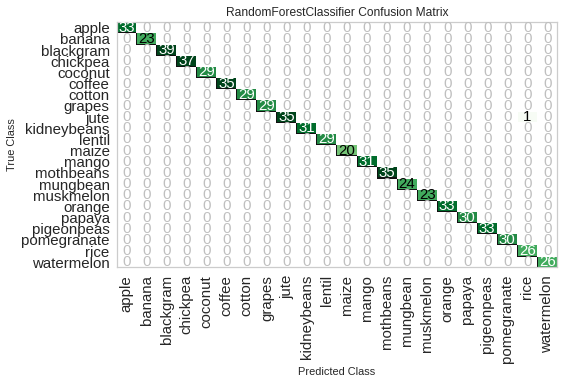

In [ ]:
plot_model(rfModel, plot='confusion_matrix')

**Plot the "learning curve"**

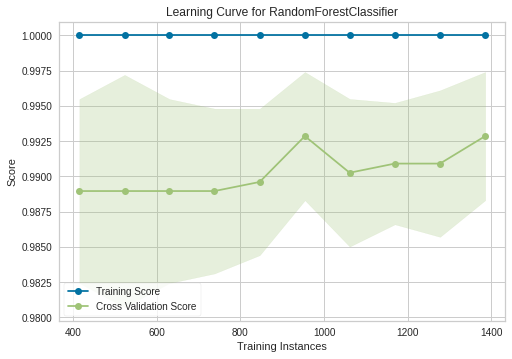

In [ ]:
plot_model(rfModel, plot='learning')

**Plot the "AUC Curve" (Area Under the Curve)**

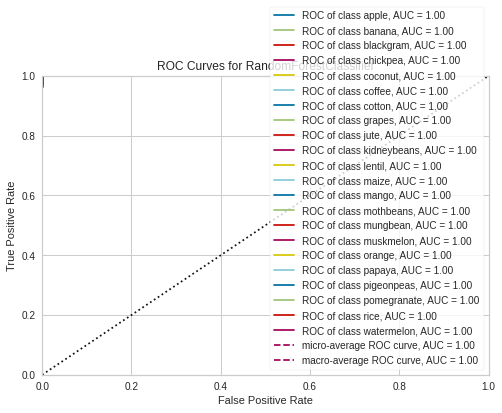

In [ ]:
plot_model(rfModel, plot='auc')

**Plot the "Decision Boundary"**

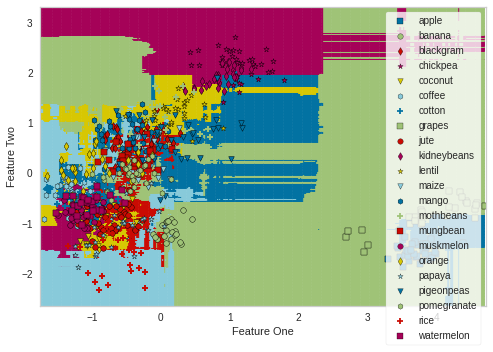

In [ ]:
plot_model(rfModel, plot='boundary')

**Get the model "parameters"**

In [ ]:
plot_model(rfModel, plot='parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_impurity_split,None


**Feature Importance using random forest**

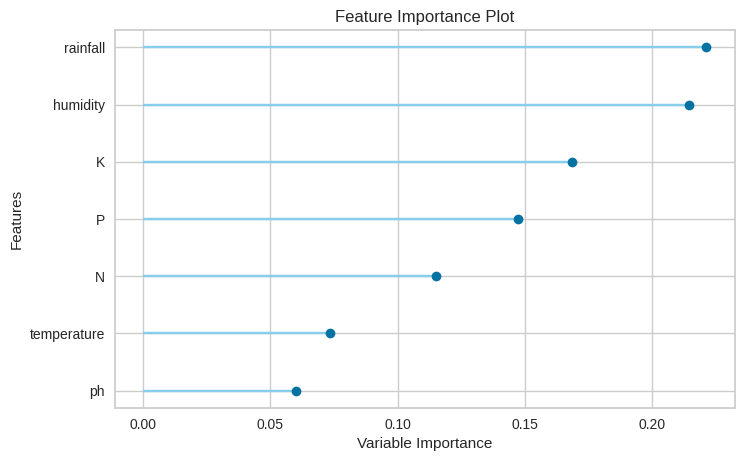

In [ ]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')